# Customer Segmentation Using Credit Card Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### Importing Dataset 

In [2]:
df = pd.read_csv('CC.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

__The data consists of 8950 rows and 18 columns__

### Finding the summary statistics of the dataset


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Checking for missing data

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Replacing null values with mean

In [6]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [7]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Exploratory Data Analysis

### Correlation Check

<AxesSubplot:>

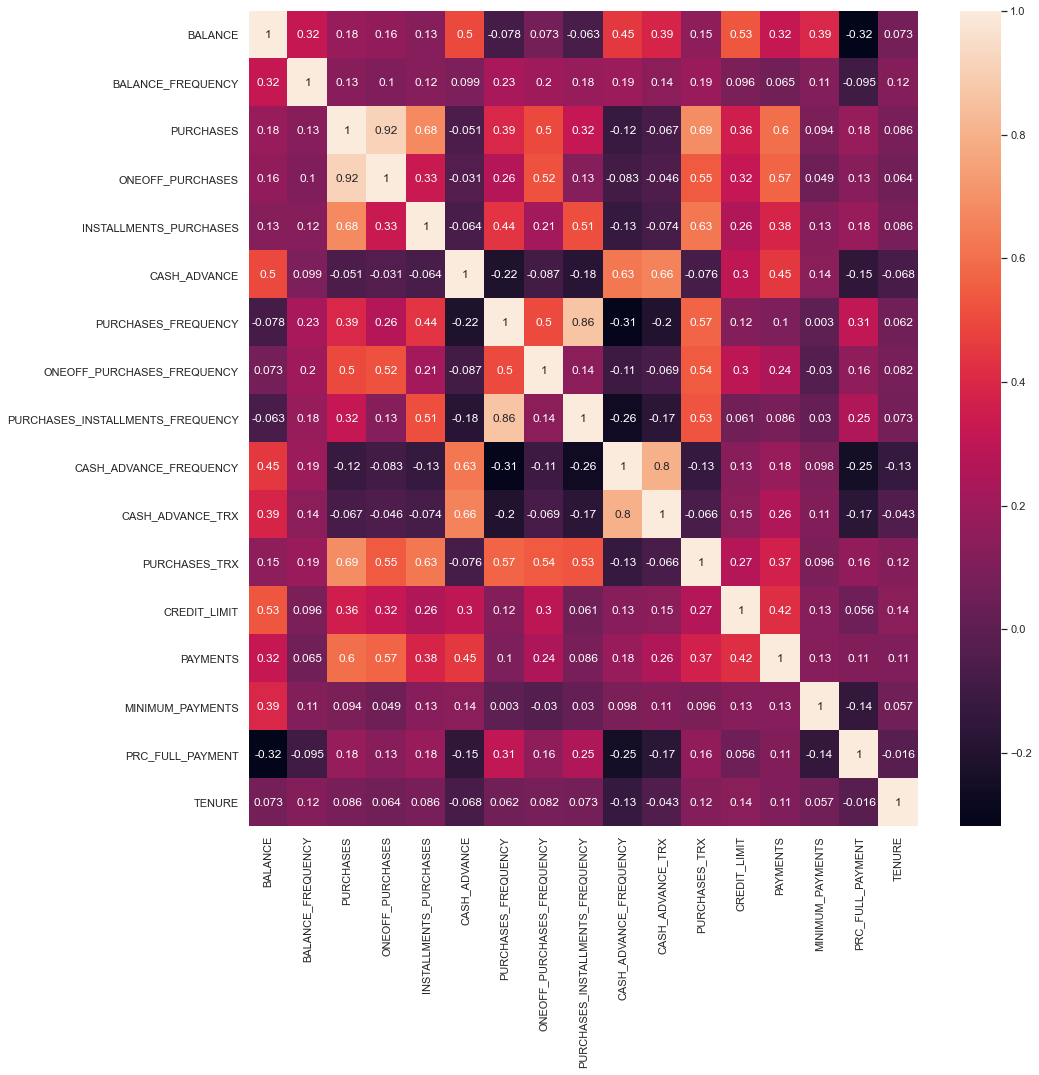

In [8]:
import seaborn as sb
plt.figure(figsize = (15, 15))
data_corr = df.corr()
sb.heatmap(data_corr,annot=True)

__Inference:__ <br>

PURCHASE and ONEOFF_PURCHASE have positve correlation of 0.92. <br>
PURCHASES_FREQUENCY and PURCHASES_INSTALLMENT_FREQUENCY 0.86. <br>
CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY has positive correlatuion of 0.8.

"PURACHASES_INSTALLMENTS_FREQUENCY" has strong positive correlation with "PURCHASE FREQUENCY"

"BALANCE" has a strong negative correlation with "PRC_FULL_PAYMENT"

"TENURE" has almost no correlation with any (No linear relationship)


### Dropping 'CUST_ID' Column

In [9]:
df.drop('CUST_ID', axis=1, inplace=True)

In [10]:
import warnings
warnings.filterwarnings('ignore')

## Density plot of every variable in the dataframe

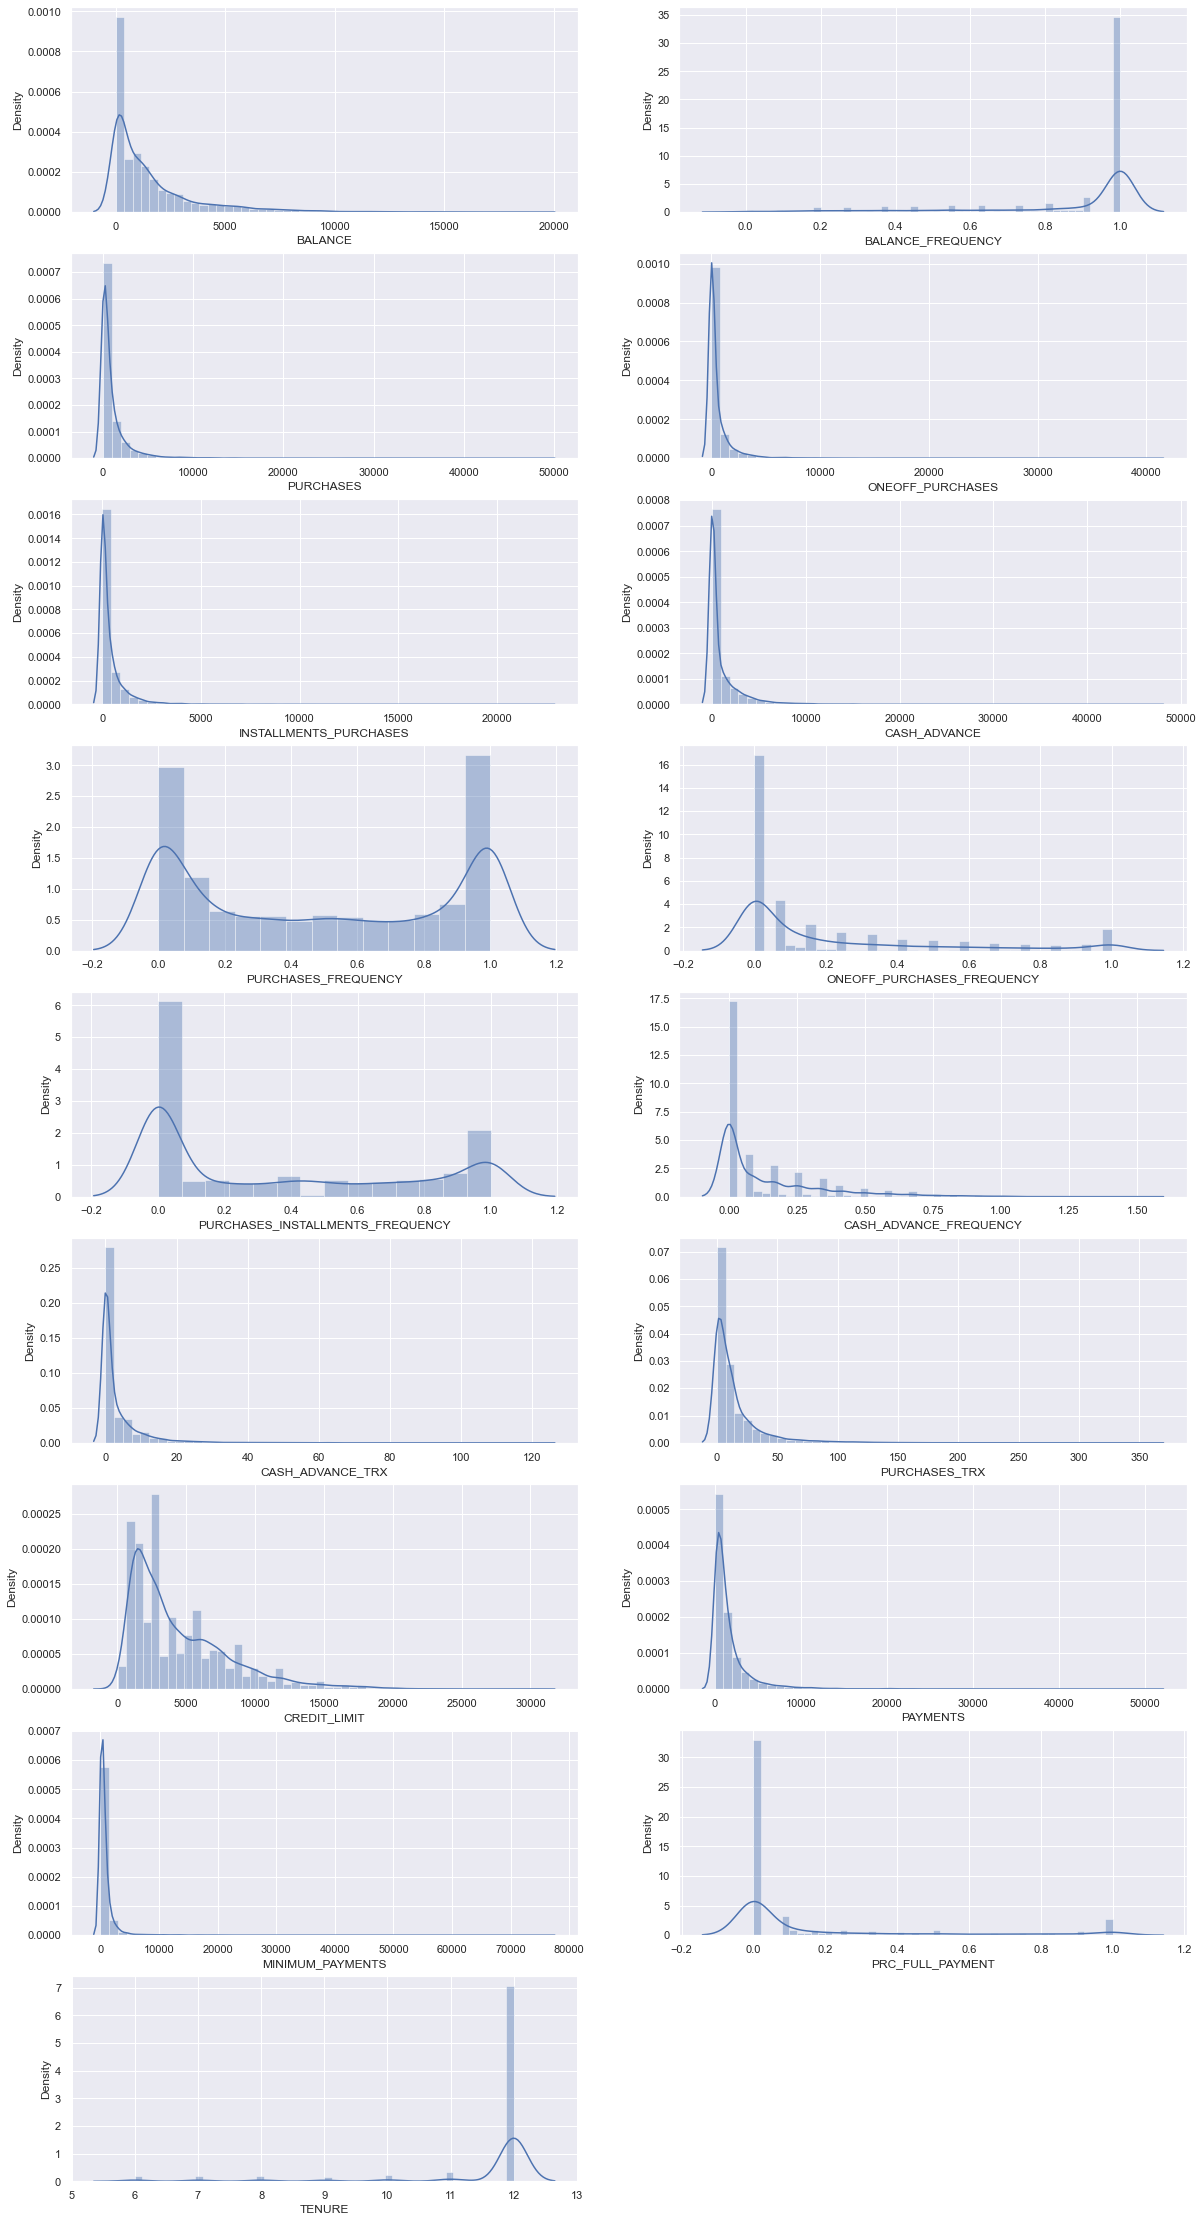

In [11]:
plt.rcParams['figure.figsize'] =(20,40)
for num in range(0,17):
    ax = plt.subplot(9,2,num+1)
    col = df.columns[num]
    sns.distplot(df[col], ax=ax)
    

__We can see the whole distribution of the dataframe. We can see from the density plot that the values are very left skewed and there are a lot of zero values.__

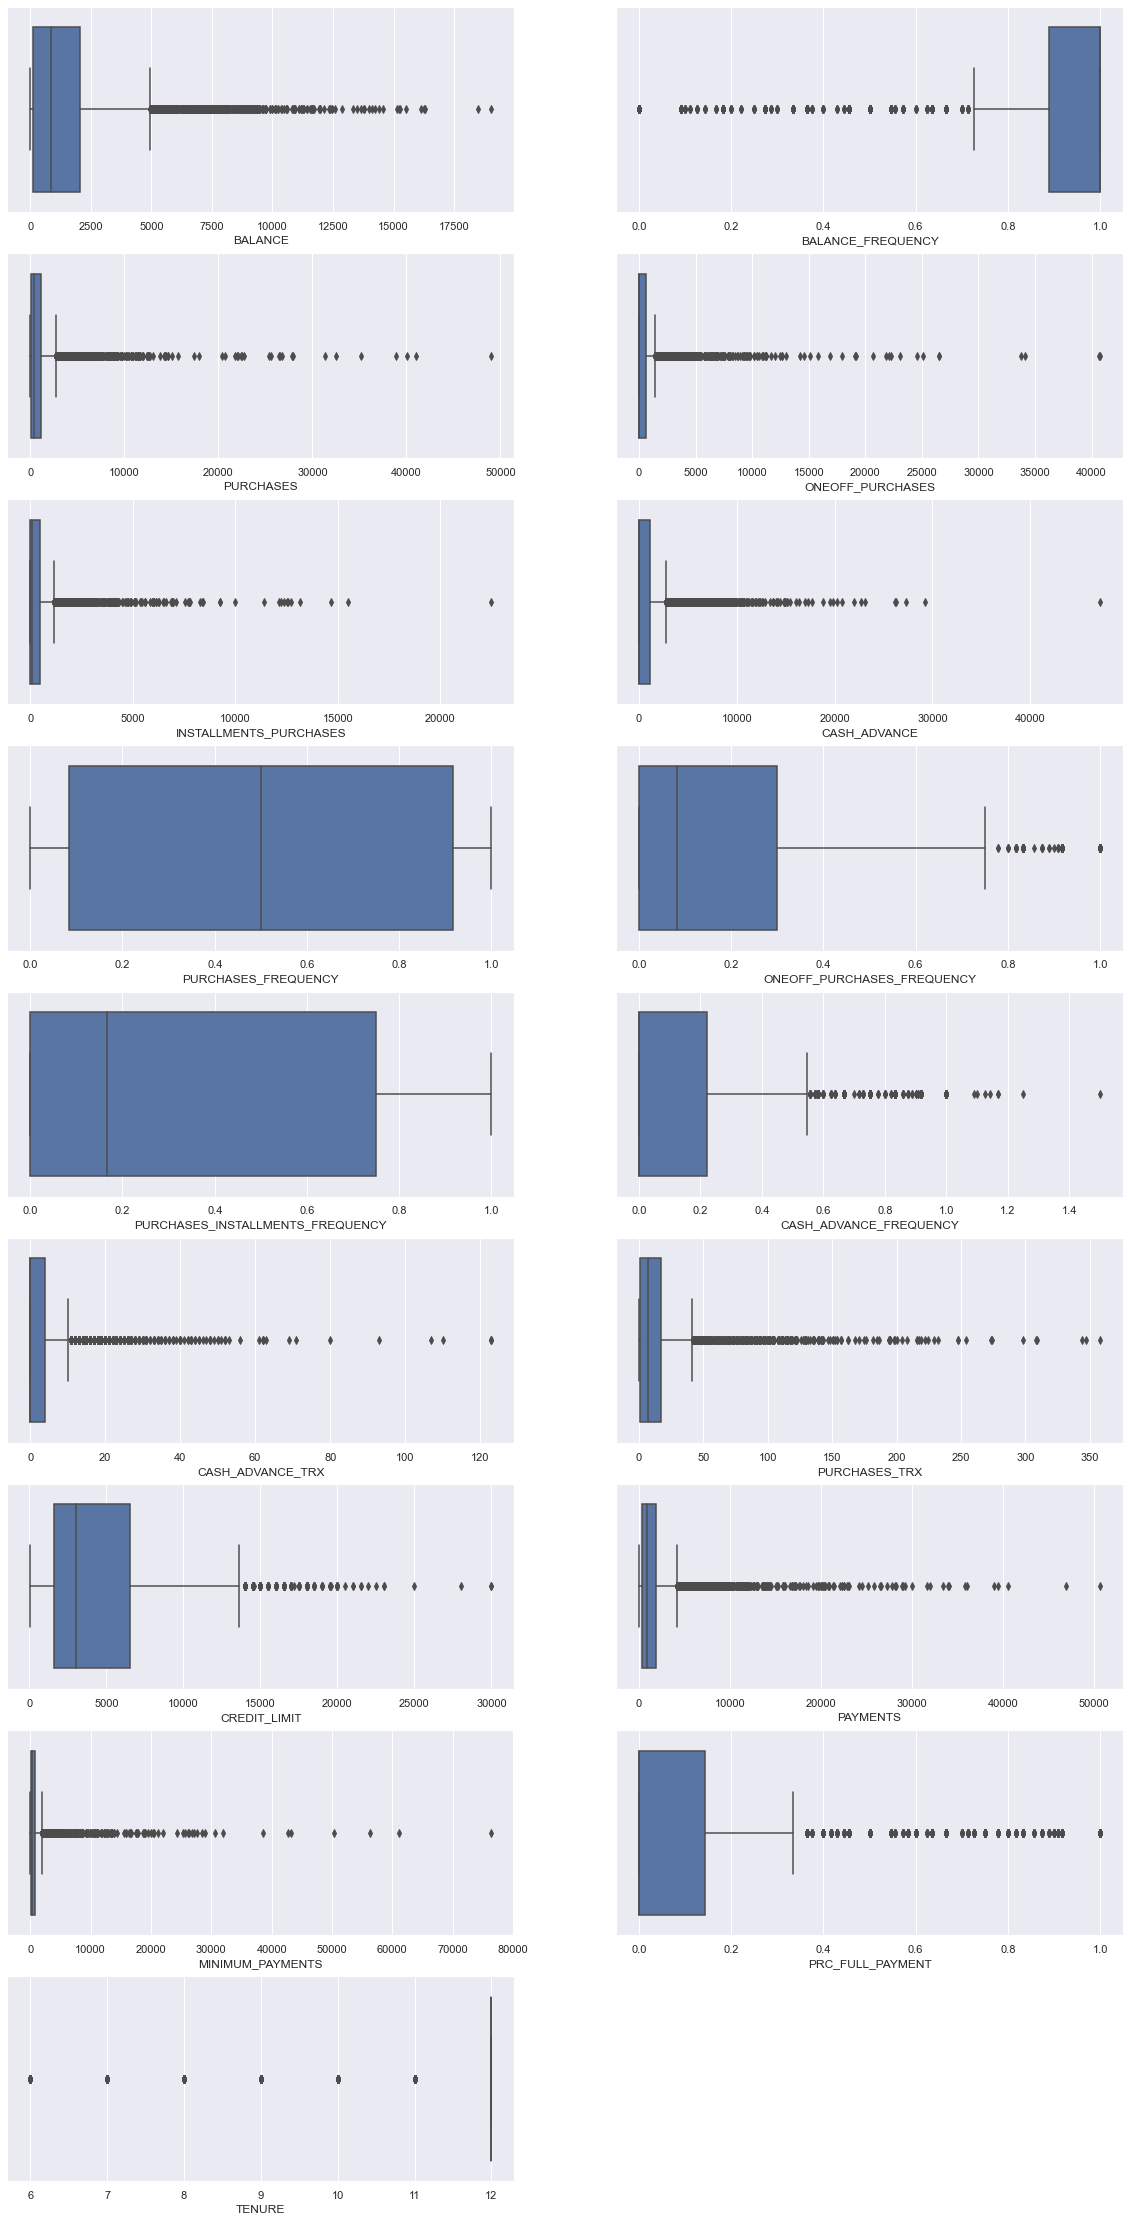

In [12]:
plt.rcParams['figure.figsize'] =(20,40)
for num in range(0,17):
    ax = plt.subplot(9,2,num+1)
    col = df.columns[num]
    sns.boxplot(df[col], ax=ax)

Text(0.5, 0, 'Balance')

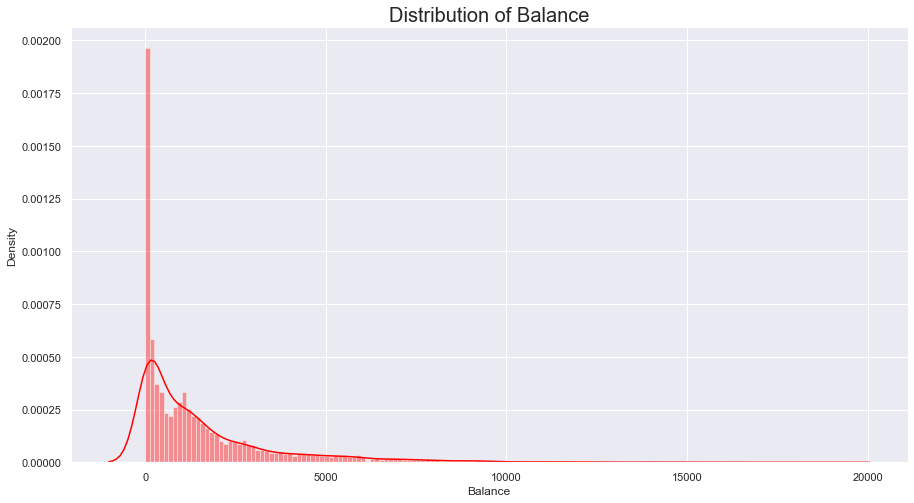

In [13]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(df['BALANCE'],bins=150, color='red')
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

__From the density plot we can infer that very high number of credit card users have 0 balance__

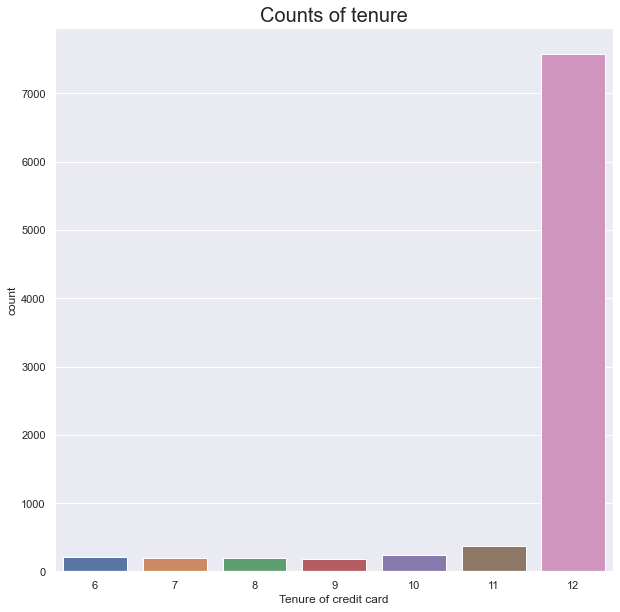

In [14]:
plt.rcParams['figure.figsize'] =(10,10)
sns.countplot(x ='TENURE', data = df)
plt.xlabel('Tenure of credit card')
plt.title('Counts of tenure', fontsize=20)

plt.show()

__Tenure,represents the repayment period for a customer using credit card. From the above graph, we see that the majority of users have tenure of 12.__

Text(0.5, 1.0, 'Counts of Balance Frequency Score')

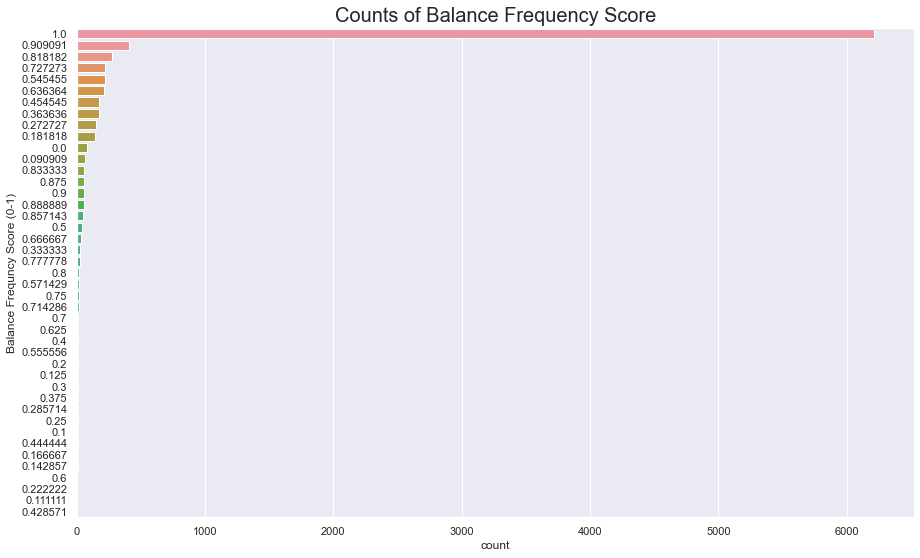

In [15]:
plt.rcParams['figure.figsize'] = (15,9)

sns.countplot(y='BALANCE_FREQUENCY', data = df,order = df['BALANCE_FREQUENCY'].value_counts().index)
plt.ylabel('Balance Frequncy Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

__Balance frequency is the score, 0-1.One being the highest score.It is the measure of how frequent people use their credit card.Most of the accounts have the score of one, the best score, meaning that most people do use credit card frequently and only a small number of people keep their cards relatively inactive.__

Text(0.5, 1.0, 'Scatterplot between Balance and Credit limit')

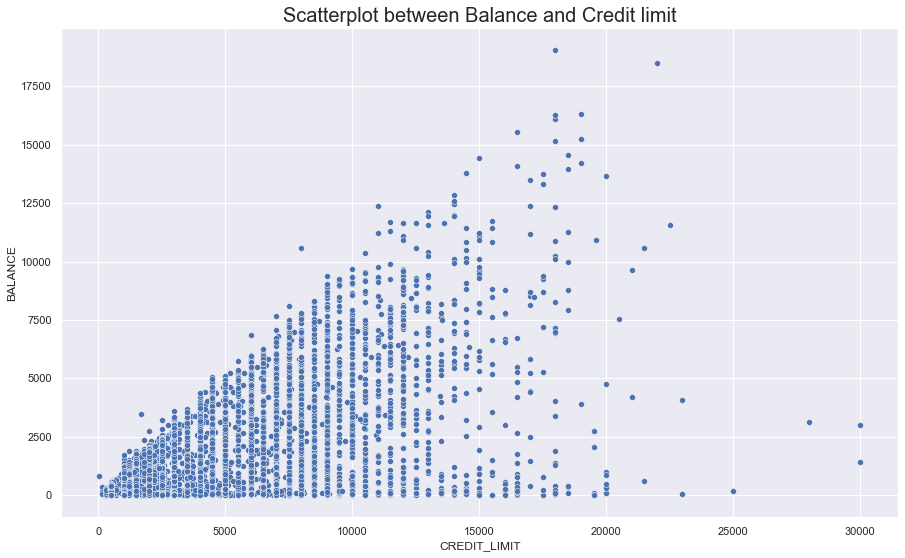

In [16]:
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df)
plt.title('Scatterplot between Balance and Credit limit', fontsize=20)

__CREDIT_LIMIT & BALANCE are in a linear relation with each other.So if a customer's balance increases, his/her credit limit shall increase & vice-versa__

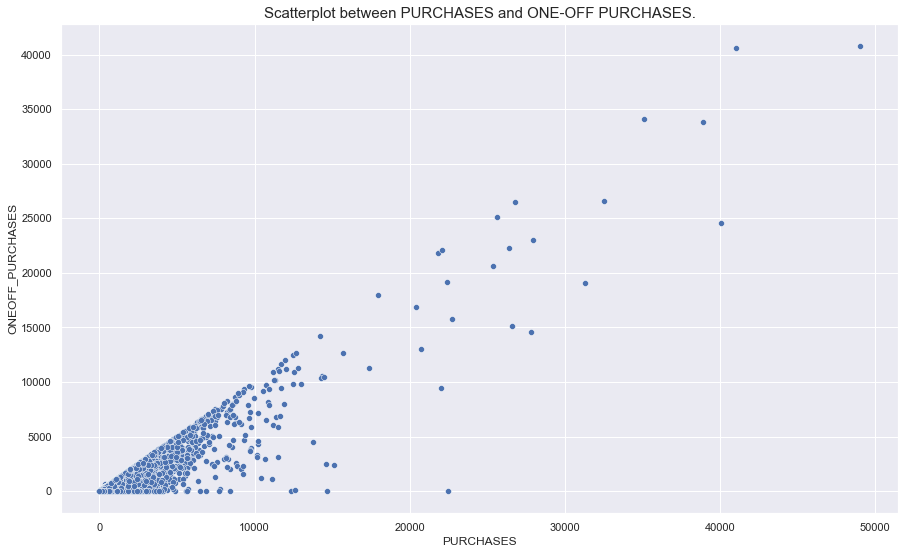

In [17]:
sns.scatterplot(x='PURCHASES', y='ONEOFF_PURCHASES', data=df)
plt.title('Scatterplot between PURCHASES and ONE-OFF PURCHASES.', fontsize=15)
plt.show()

__There is linear relationship between purchase and one-off purchase. It is because purchase is the sum of one-off purchase and installment purchase.__

Text(0.5, 1.0, 'Tenure against the frequency of cash advances')

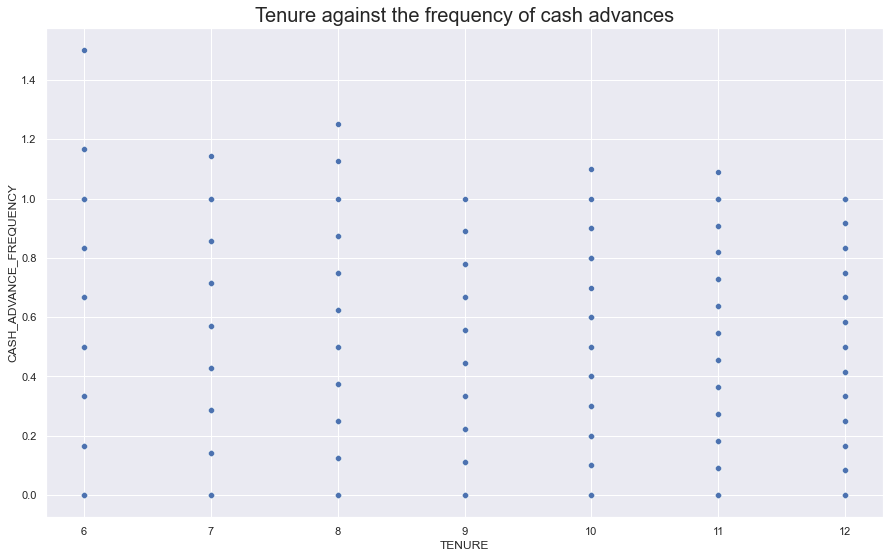

In [18]:
sns.scatterplot(x='TENURE',y='CASH_ADVANCE_FREQUENCY',data=df)
plt.title('Tenure against the frequency of cash advances', fontsize=20)

__We can see that that all the long time users (tenure is 9-12) have a lower cash advance frequency, whereas new users (tenure is 6 -8) have a higher cash advance frequency.__

Text(0.5, 1.0, 'Tenure against Minimum Payments')

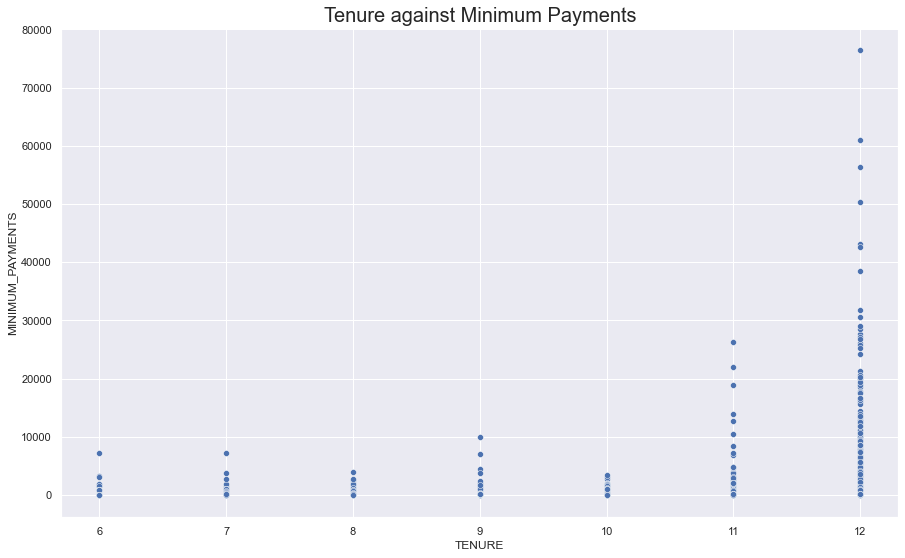

In [19]:
sns.scatterplot(x='TENURE',y='MINIMUM_PAYMENTS',data=df)
plt.title('Tenure against Minimum Payments', fontsize=20)

__The minimum payment is the smallest amount of money that you have to pay each month to keep your account in good standing.Here, we can see that more tenure means more minimum payments.So, users with long tenure pay more to keep their account without fines or late fees charges.__

### Density plot for a few attributes of the dataset.

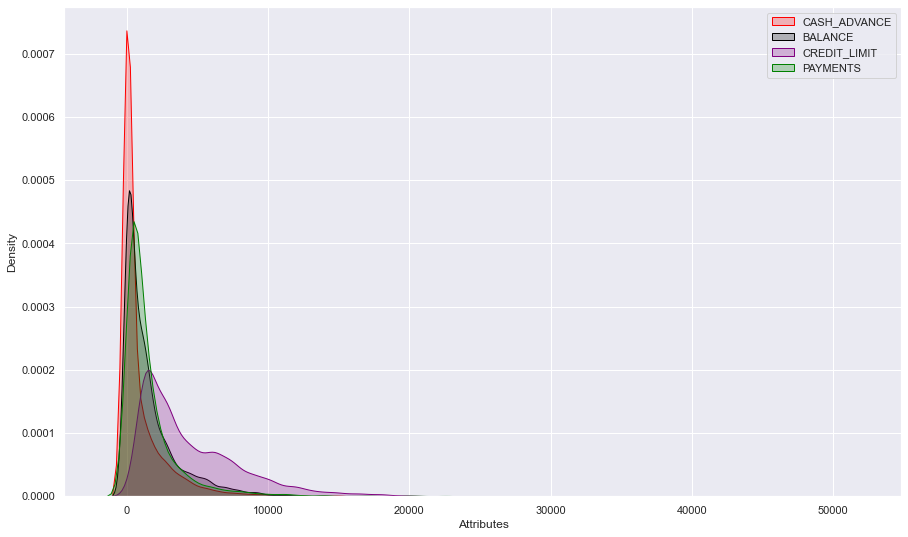

In [20]:
fig=sns.kdeplot(df['CASH_ADVANCE'], shade=True, color="red",label='CASH_ADVANCE')
fig=sns.kdeplot(df['BALANCE'], shade=True, color="black", label='BALANCE')
fig=sns.kdeplot(df['CREDIT_LIMIT'], shade=True, color="purple",label='CREDIT_LIMIT')
fig=sns.kdeplot(df['PAYMENTS'], shade=True, color="green",label='PAYMENTS')
fig.set(xlabel='Attributes')
plt.legend()

<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='Count'>

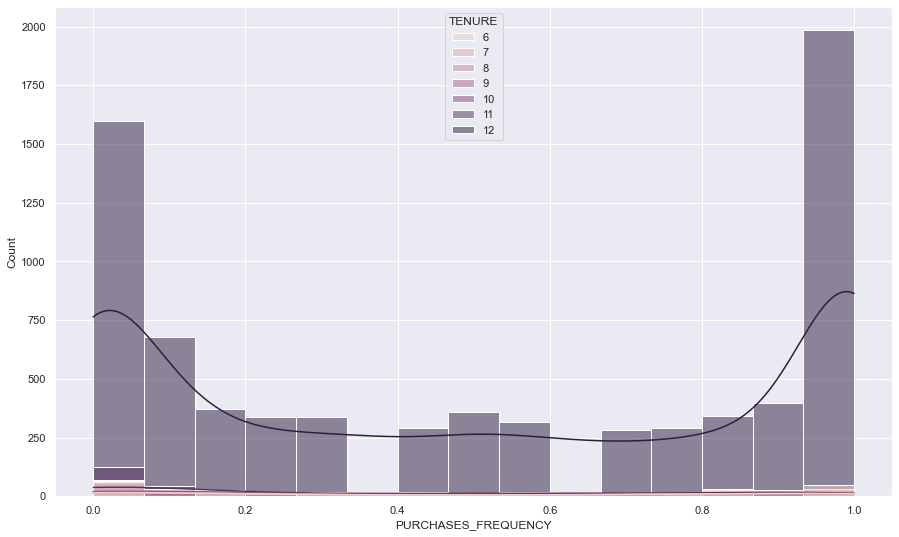

In [21]:
plt.rcParams['figure.figsize'] = (15,9)
sns.histplot(data = df, x = "PURCHASES_FREQUENCY", kde = True, hue = "TENURE")

__The count of purchase frequency is mostly even through out, with it increasing for purchase frequency 0 and 1.__


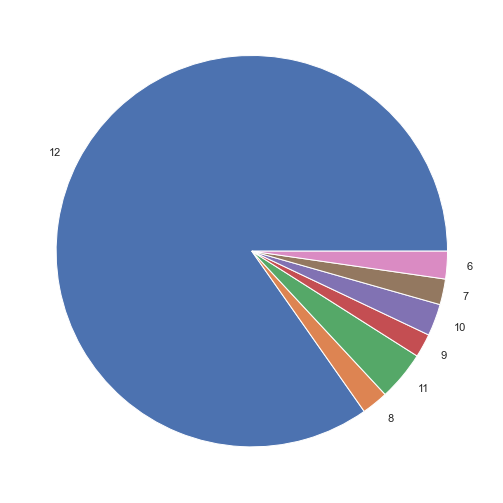

In [22]:
import matplotlib.pyplot as plt
import collections
ten = collections.Counter(df['TENURE'])
labels = []
sizes = []
for x, y in ten.items():
    labels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=labels)
plt.show()

__The most common type of tenure of credit card service is for 12__

<AxesSubplot:xlabel='TENURE', ylabel='BALANCE'>

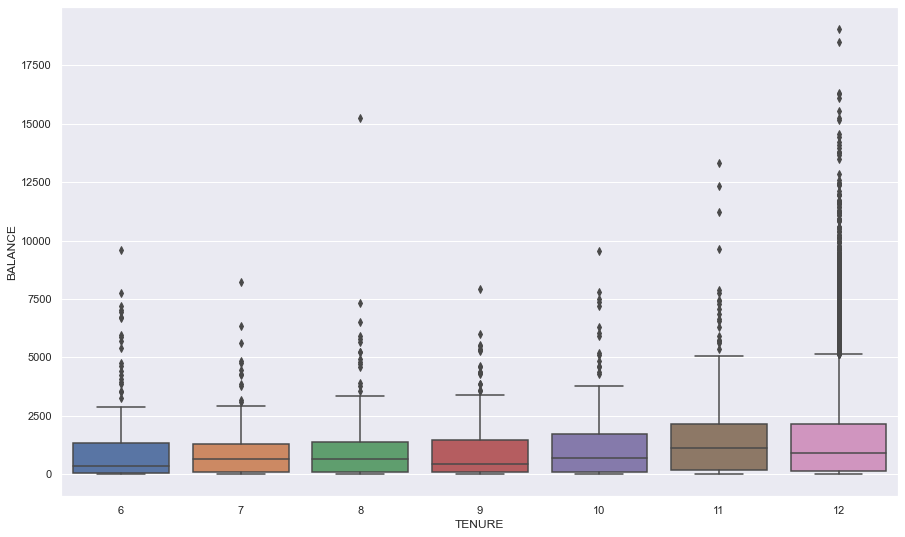

In [23]:
sns.boxplot(x = 'TENURE', y = 'BALANCE', data = df)

__The median value of balance is similar for all type of tenure. However tenure of 12 has the highest number of outliers.__

# Applying Different Clustering Methods

## Scaling the data

In [24]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## KMeans Clustering
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K distinct non-overlapping subgroups (clusters) where each data point belongs to only one group

Text(0, 0.5, 'wcss')

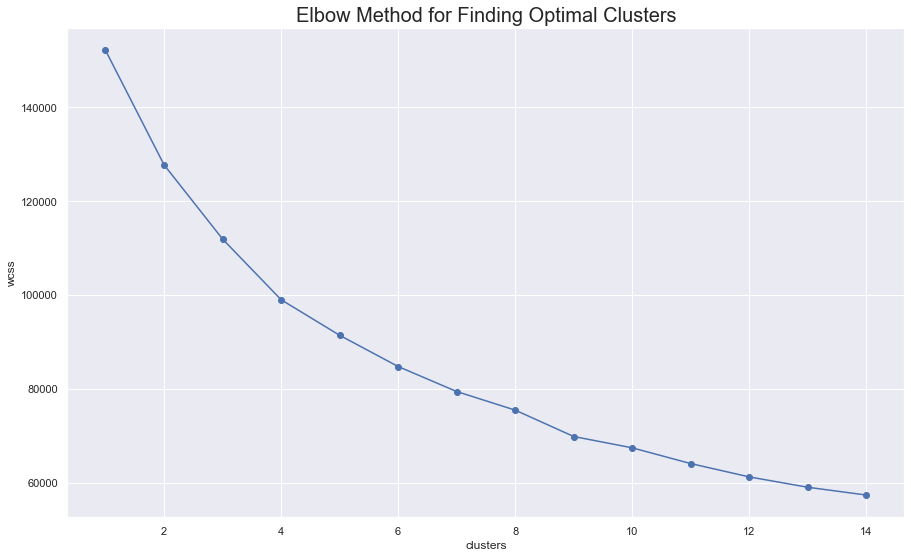

In [25]:
# model building, elbow method
from sklearn.cluster import KMeans
wcss= []

for i in range(1,15): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(scaled_df)
    wcss.append(km.inertia_)
    
plt.plot(range(1,15),wcss, marker='o')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('wcss')

__Using the elbow method, we find a good number of clusters to be 6__

In [26]:
#Building the model at 6 clusters
km = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
label = km.fit_predict(scaled_df)

df2=df.copy()
df2['label'] = label
df2.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,5
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,4
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1


Text(0, 0.5, 'Purchases')

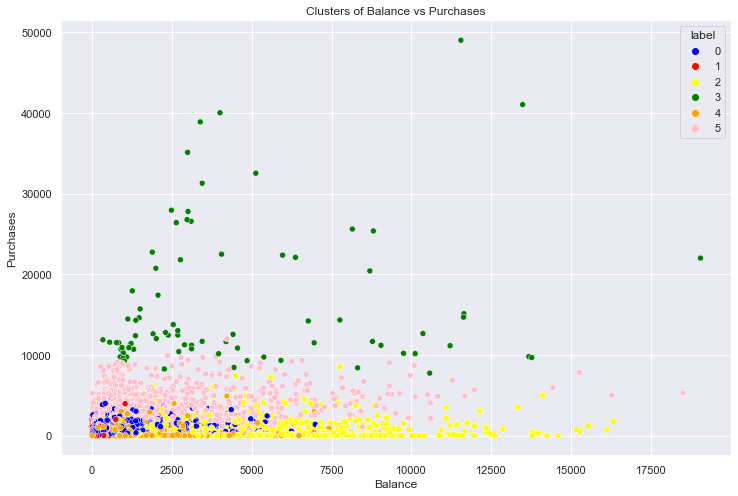

In [27]:
# A closer look at balance vs purchases with clusters centers
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df2['BALANCE'],df2['PURCHASES'], hue=df2['label'], palette=['blue','red','yellow','green','orange','pink'])#,'black','brown'])
plt.title('Clusters of Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')

### Applying principal component analysis to the dataset and finding two principal components

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': label})], axis = 1)
pca_df.head()


,pca1,pca2,cluster
0,-1.682219,-1.076448,4
1,-1.138293,2.506469,2
2,0.969683,-0.383558,5
3,-0.873625,0.043175,4
4,-1.599433,-0.688580,4


Applying Principal Component Analysis (PCA) to transform data into 2 dimensions for visualization because we won’t be able to visualize the data in 17 dimensions

### Visualizing the Clusters using the two principal components

Text(0.5, 1.0, 'Clusters using PCA')

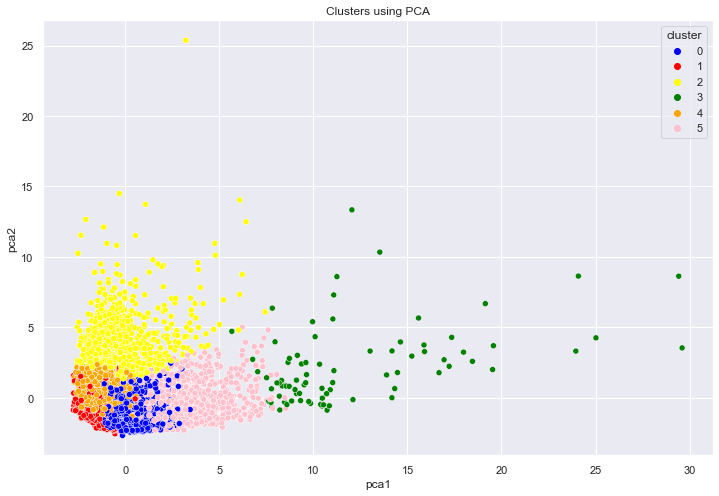

In [29]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(pca_df['pca1'],pca_df['pca2'], hue=pca_df['cluster'], palette=['blue','red','yellow','green','orange','pink'])
plt.title('Clusters using PCA')


### KMeans after PCA

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(scaled_df)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2.head()

,pca1,pca2
0,-1.682223,-1.076449
1,-1.138300,2.506496
2,0.969699,-0.383558
3,-0.873630,0.043172
4,-1.599437,-0.688582


In [31]:
km = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
label2 = km.fit_predict(pca_df2)
df3=df.copy()
df3['label'] = label2
df3.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,4
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,4
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


Text(0.5, 1.0, 'Clustering using KMeans')

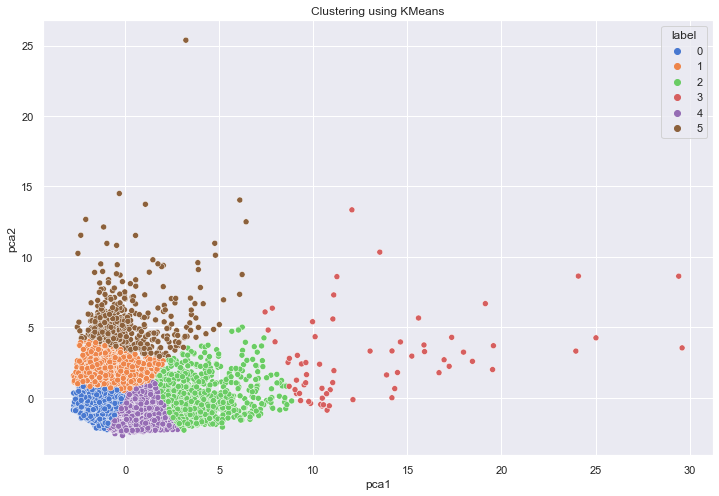

In [32]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(pca_df2['pca1'],pca_df2['pca2'], hue=df3['label'], palette='muted')
plt.title('Clustering using KMeans')


## DBSCAN Clustering
The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 


In [33]:
from sklearn.cluster import DBSCAN

In [34]:
dbscan = DBSCAN(eps=0.5,min_samples=10)
dbscan.fit(pca_df2)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
dbscan_df = df.copy()
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


Text(0.5, 1.0, 'Clustering Using DBSCAN')

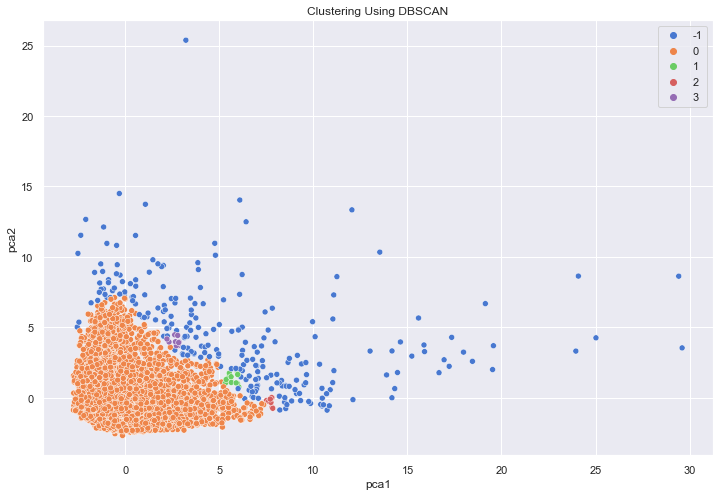

In [36]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(pca_df2['pca1'],pca_df2['pca2'], hue=y_dbscan_pred, palette='muted')
plt.title('Clustering Using DBSCAN')

## Agglomerative Clustering
This algorithm treats each data as a singleton cluster and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster_labels=cluster.fit_predict(pca_df2)  
df4=df.copy()
df4['label'] = cluster_labels
df4.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,5
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,5
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,3
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,3


Text(0.5, 1.0, 'Clusters Using Agglomerative Clustering')

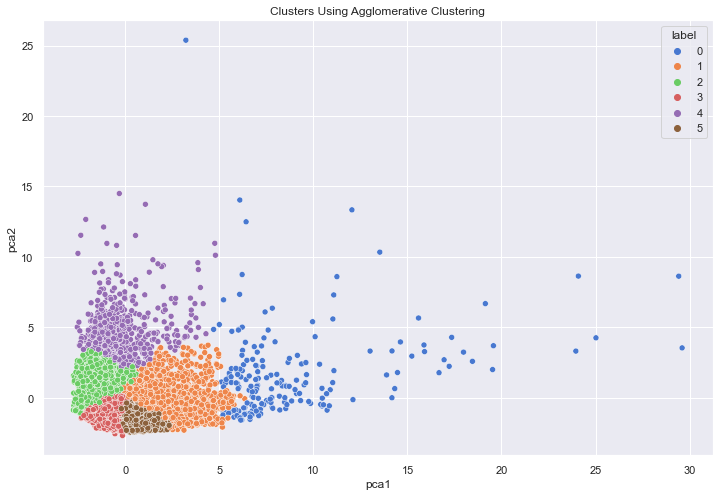

In [39]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(pca_df2['pca1'],pca_df2['pca2'], hue=df4['label'], palette='muted')
plt.title('Clusters Using Agglomerative Clustering')


## Gaussian Mixture Clustering
Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

In [40]:
from sklearn.mixture import GaussianMixture

In [41]:
model = GaussianMixture(n_components=6)
y = model.fit_predict(pca_df2)
df5=df.copy()
df5['label'] = cluster_labels
df5.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,5
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,5
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,3
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,3


Text(0.5, 1.0, 'Clusters Using Gaussian Mixture')

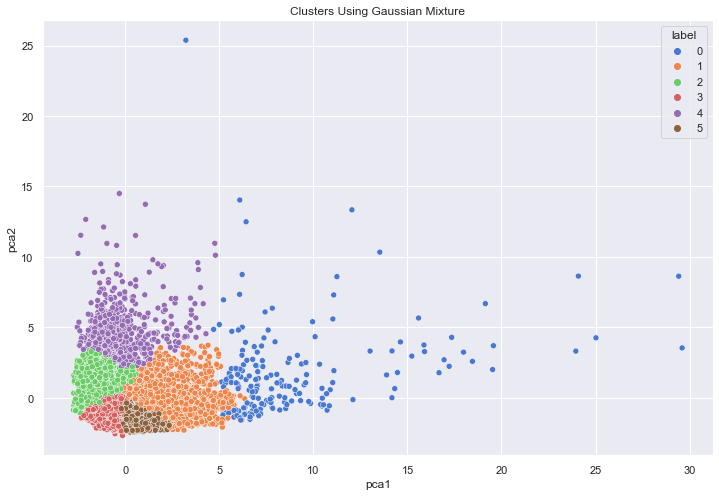

In [42]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(pca_df2['pca1'],pca_df2['pca2'], hue=df5['label'], palette='muted')
plt.title('Clusters Using Gaussian Mixture')


# Visualizing Clusters

In [43]:
df3.label.value_counts()

0    3041
4    2970
1    1573
2     878
5     423
3      65
Name: label, dtype: int64

Text(0.5, 1.0, 'Visualizing Clusters')

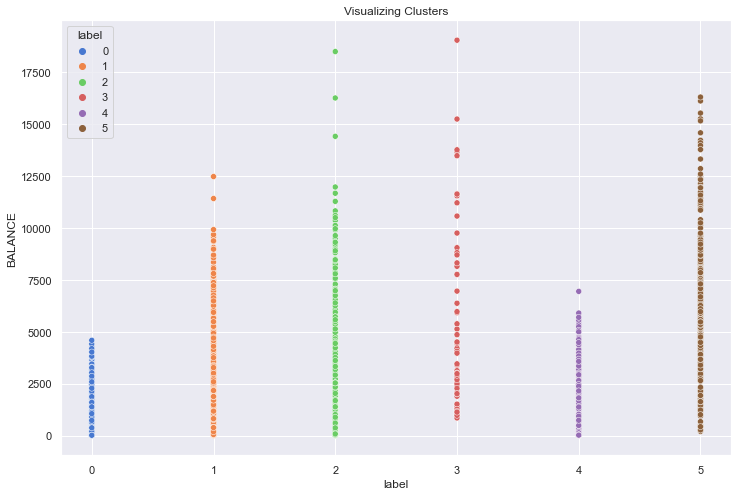

In [44]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['BALANCE'], hue=df3['label'], palette='muted')
plt.title('Visualizing Clusters')

In [45]:
#Cluster 0 least balance left in their account. Cluster 5 has the highest balance.

<AxesSubplot:xlabel='label', ylabel='BALANCE_FREQUENCY'>

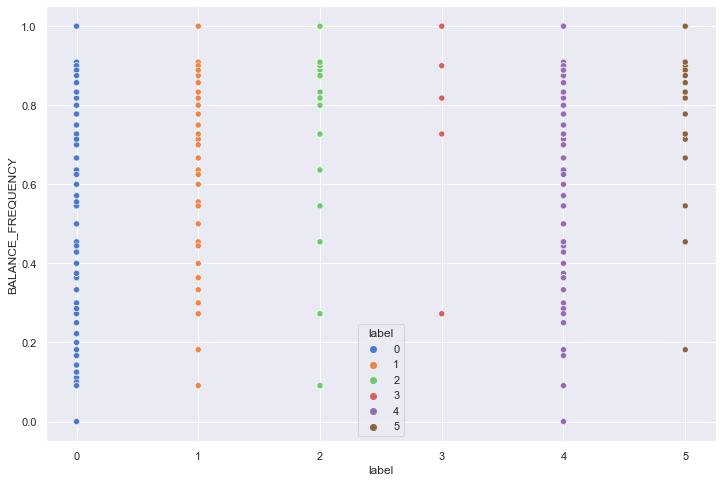

In [46]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['BALANCE_FREQUENCY'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='PURCHASES'>

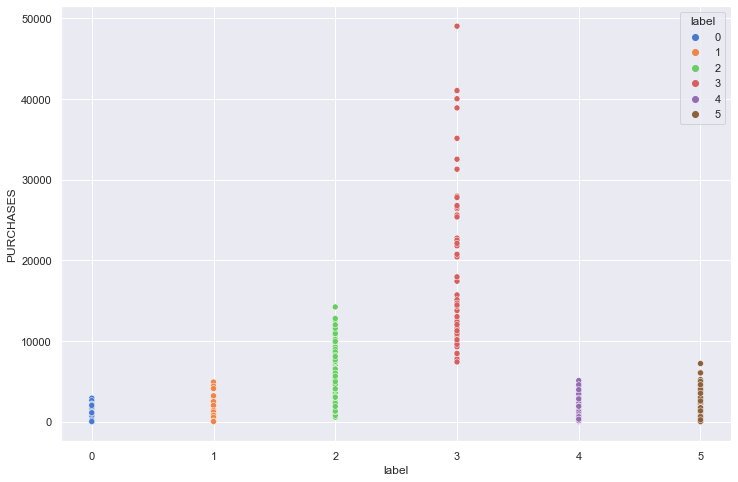

In [47]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['PURCHASES'], hue=df3['label'], palette='muted')

In [48]:
#Cluster 0 has the least amount of purchases made from their account, cluster 3 has a very high amount of purchases

<AxesSubplot:xlabel='label', ylabel='ONEOFF_PURCHASES'>

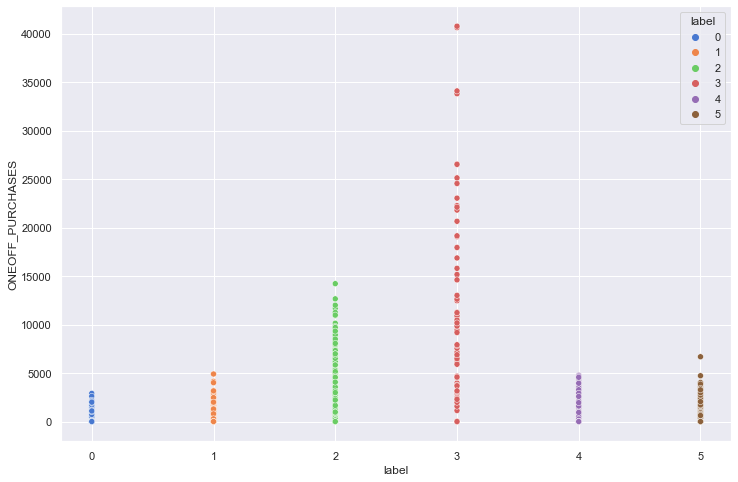

In [49]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['ONEOFF_PURCHASES'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='INSTALLMENTS_PURCHASES'>

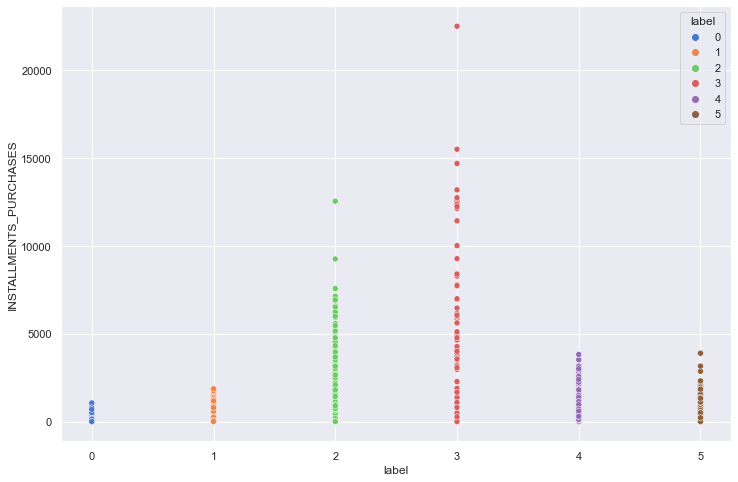

In [50]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['INSTALLMENTS_PURCHASES'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='CASH_ADVANCE'>

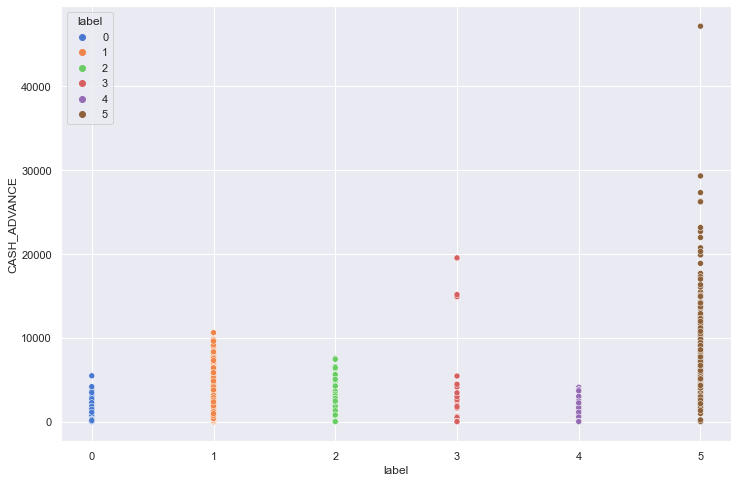

In [51]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['CASH_ADVANCE'], hue=df3['label'], palette='muted')

In [52]:
#Cluster 4 has lowest cash in advance, 5 has the highest

<AxesSubplot:xlabel='label', ylabel='PURCHASES_FREQUENCY'>

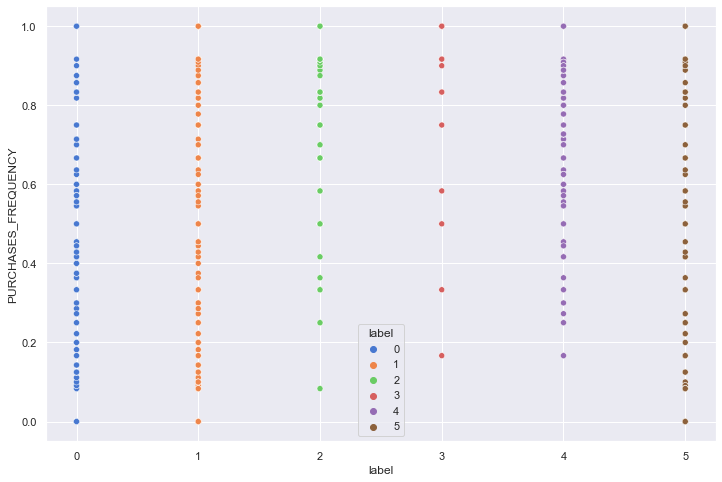

In [53]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['PURCHASES_FREQUENCY'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='ONEOFF_PURCHASES_FREQUENCY'>

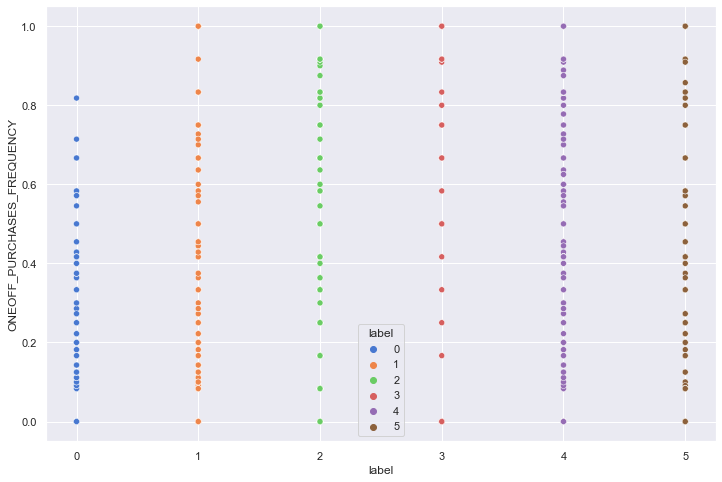

In [54]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['ONEOFF_PURCHASES_FREQUENCY'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

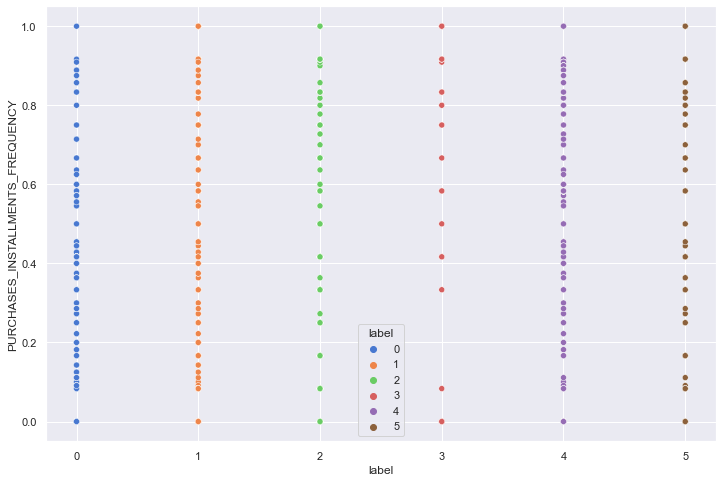

In [55]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['PURCHASES_INSTALLMENTS_FREQUENCY'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='CASH_ADVANCE_FREQUENCY'>

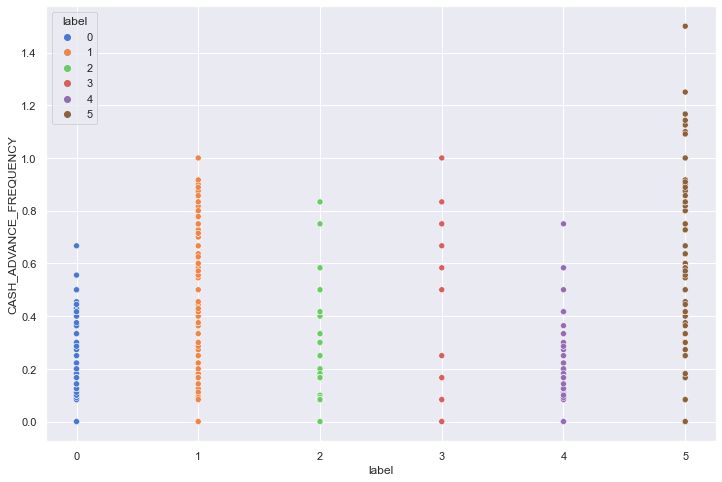

In [56]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['CASH_ADVANCE_FREQUENCY'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='CASH_ADVANCE_TRX'>

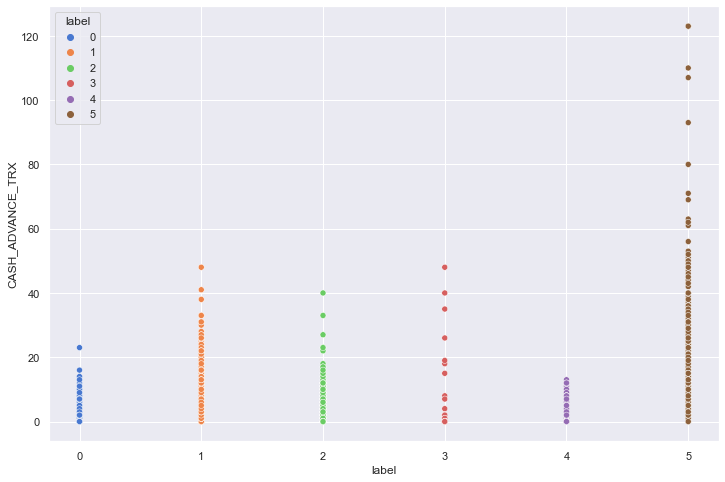

In [57]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['CASH_ADVANCE_TRX'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='PURCHASES_TRX'>

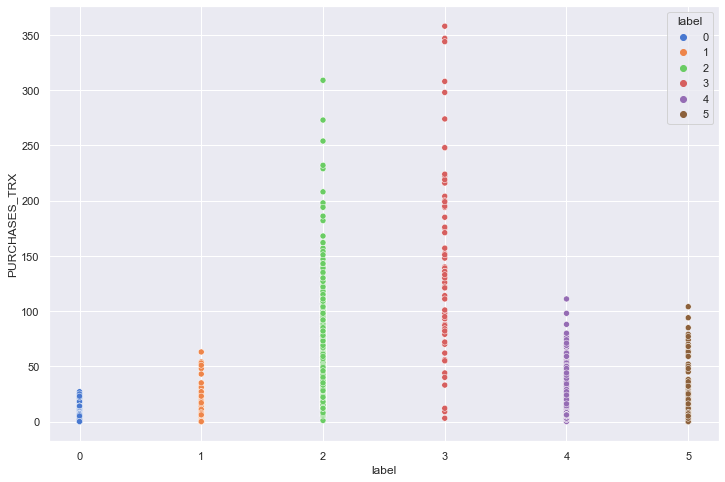

In [58]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['PURCHASES_TRX'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='CREDIT_LIMIT'>

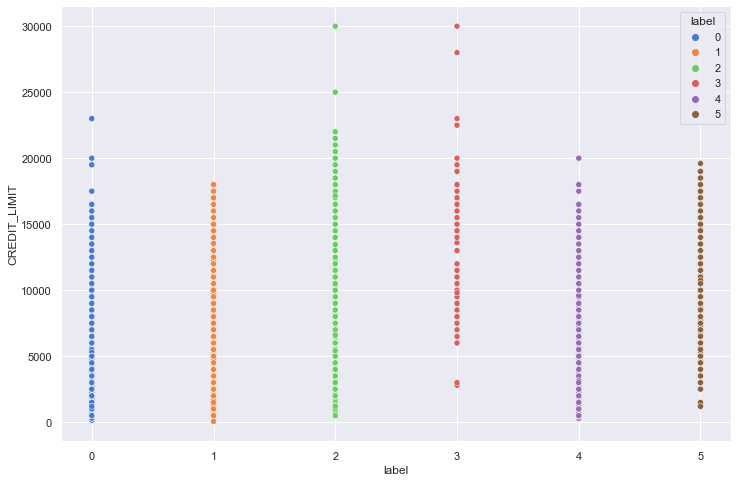

In [59]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['CREDIT_LIMIT'], hue=df3['label'], palette='muted')

In [60]:
#clusters 0,1,4,5 have low credit limit while 2,3 have higher credit limit

<AxesSubplot:xlabel='label', ylabel='PAYMENTS'>

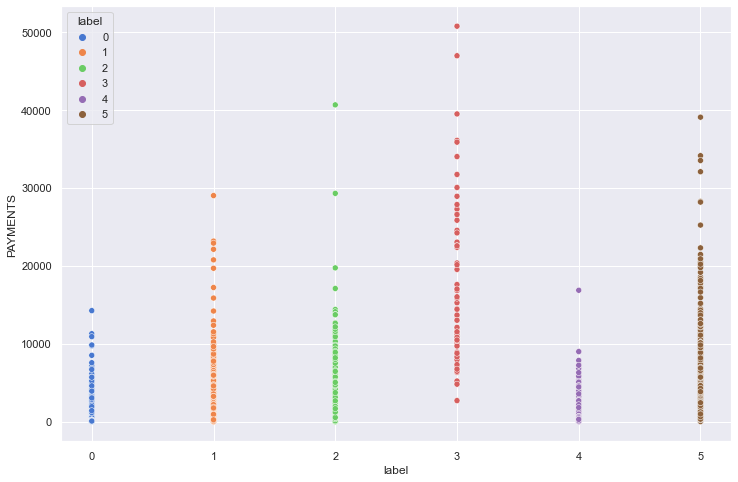

In [61]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['PAYMENTS'], hue=df3['label'], palette='muted')

In [62]:
#clusters 1 and 4 have the lowest amount of payments done. Cluster 3 has the highest payments

<AxesSubplot:xlabel='label', ylabel='MINIMUM_PAYMENTS'>

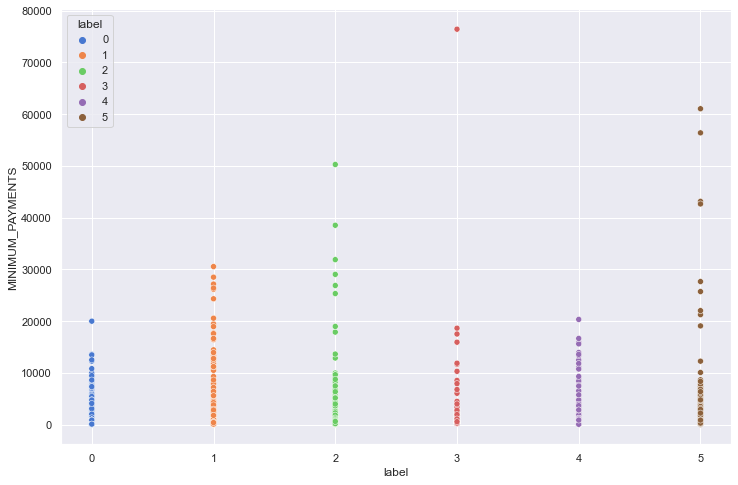

In [63]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['MINIMUM_PAYMENTS'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='PRC_FULL_PAYMENT'>

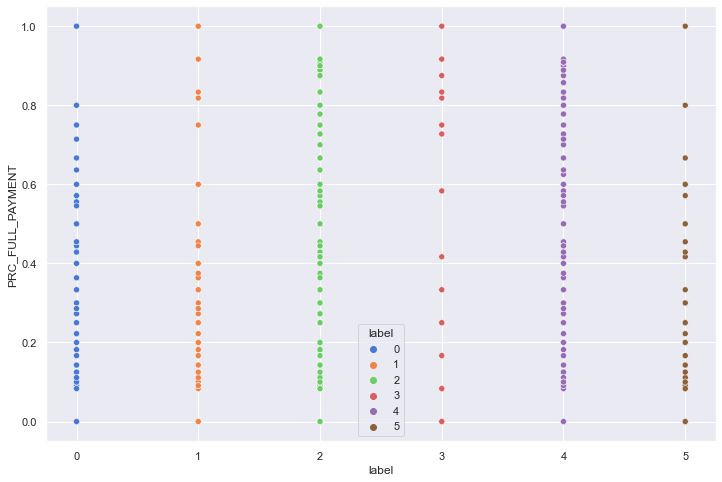

In [64]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['PRC_FULL_PAYMENT'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='label', ylabel='TENURE'>

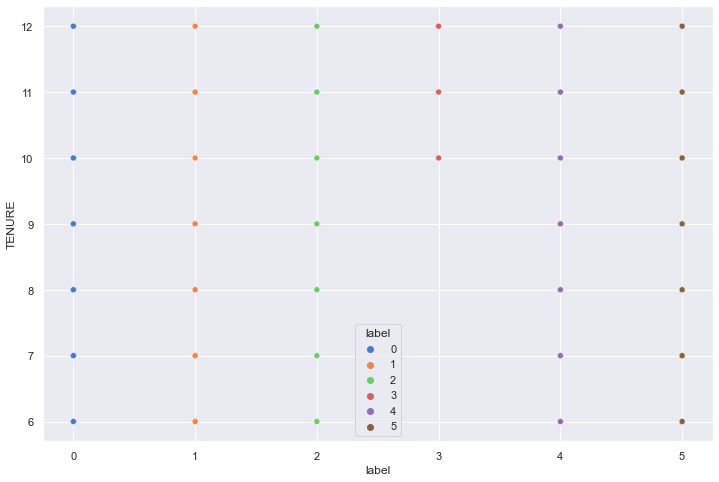

In [65]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['label'],df3['TENURE'], hue=df3['label'], palette='muted')

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

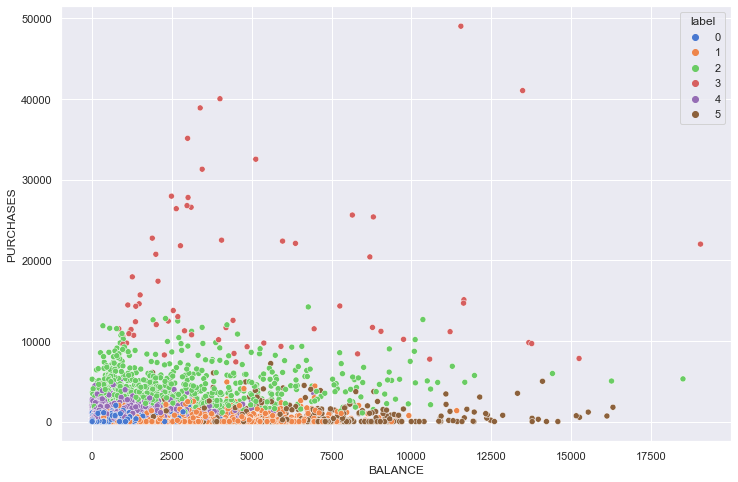

In [66]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df3['BALANCE'],df3['PURCHASES'], hue=df3['label'], palette='muted')

## INFERENCE

__Cluster 0 - Has low balance in their accounts. Have a very low amount of purchases made. Have given a low amount of cash in advance. Have a low to medium limit of credit card. And so have a low amount of payments done. 
While this cluster has the maximum number of people, they are frugal and hardly use their credit card. The bank would not make much profit from this group, and so should not focus any additional efforts on them__


__Cluster 1 - Has a moderate amount of balance but a low amount of purchases. Their cash advance, credit limit and payments is also average.
They present a low amount of risk so the bank doesn't need to put extra effort to keep track of them.__

__Cluster 2 - Has a higher amount of balance and a higher amount of purchases than most other groups. However they have low cash advance and payments. Their credit limit is high.
This group present more of a risk so the bank can put more effort to keep track of them and if needed lower their credit limit.__

__Cluster 3 - Has the least number of customers. They have a high amount of balance and their purchase amount is the highest, much higher than all other cluster. Their payments, cash advance and credit limit are also high.__

__This group spends the most and are reliable so the bank should make more of an effort to attract and keep customers belonging to this cluster.__

__Cluster 4 - Has a lower amount of balance, purchases, cash advance, payments and average credit limit. 
While this is similar to cluster 0, this group does have slightly higher balance and purchases. Since they also present low risk, the bank can make sure to retain these customers.__

__Cluster 5 - This group has the highest amount of balance in their accounts along with very high cash advance. They have average purchases, credit limit and average to high payments.
These customers are very dependable and spend a moderate amount of money. The bank should make sure to retain and attract people belonging to this cluster.__